# Cell sorting with "Autofluorescence" activity

### The aim of this code is to show that there is a cell-specific autofluorescence acitivity, and it can be used to sort cell types using algorithms
#### Spectral flow cytometry or full-spectrum profiling (FPS) is a sophisticated form of conventional flow cytometry that enable us to stain our cell with more than 100 antibodies. There is an initial step in using FPS through which we reduce the autofluorescence of cell in each channel (wavelenght) from the strong signal enowed to cells by fluorescent-conjugated antibodies. Here, I used the Unstaind control of PBMC from human to prove the value of autofluorescence in cell sorting. The sample is generated by Cytek Aurora and 64 channels are recorded.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### We need to first import our data, the data is already converted to .csv format from .FCS format

In [2]:
Raw = pd.read_csv("All_Unstained.csv")

In [3]:
Raw.head(2)

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,B1-A,B10-A,B11-A,B12-A,...,YG10-A,YG2-A,YG3-A,YG4-A,YG5-A,YG6-A,YG7-A,YG8-A,YG9-A,Time
0,322,288,73,141,115,66,400,387,372,387,...,384,399,395,410,394,387,400,395,377,0
1,338,297,81,157,127,71,408,379,378,393,...,381,391,380,399,372,379,392,393,381,0


### Sampling and Splitting data into Autofluorescence (AF) channels and Scatter(SC) values

In [4]:
Sample = Raw.sample(frac=0.01)
AF = Sample.iloc[:, 6:70]
AF.head(2)

,B1-A,B10-A,B11-A,B12-A,B13-A,B14-A,B2-A,B3-A,B4-A,B5-A,...,YG1-A,YG10-A,YG2-A,YG3-A,YG4-A,YG5-A,YG6-A,YG7-A,YG8-A,YG9-A
709825,408,384,385,374,379,378,407,402,388,381,...,390,380,390,396,408,386,397,393,386,371
593311,404,385,399,377,366,384,407,411,382,390,...,390,386,380,390,394,403,396,371,389,377


In [5]:
SC = Sample.iloc[:, :6]

#Since side scatter in flow cytometry is mostely shown in log10, we need to convert the values to log
SC.loc[:, 'SSC-A'] = np.log10(SC.loc[:, 'SSC-A'])
SC.head(2)

/var/folders/7z/yhlc4cg548346yd1n98ph89m0000gp/T/ipykernel_51780/3086437425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SC.loc[:, 'SSC-A'] = np.log10(SC.loc[:, 'SSC-A'])


,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H
709825,295,267,1.681241,89,79,46
593311,343,309,1.819544,145,125,62


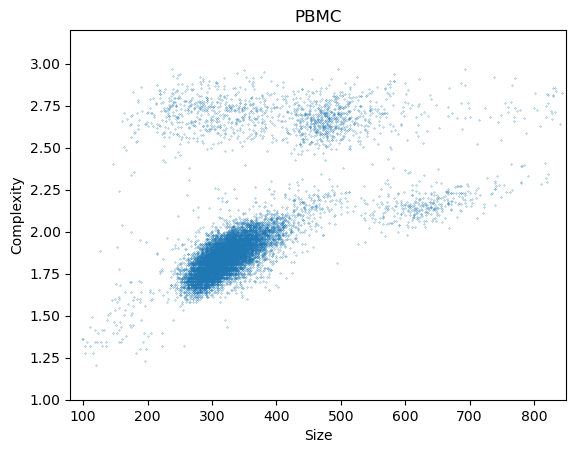

In [7]:
# now let's just plot our data with scatter values to check them
plt.scatter(SC['FSC-A'], SC['SSC-A'], s=0.05)

plt.xlabel('Size')
plt.ylabel('Complexity')
plt.title('PBMC')

plt.xlim(80, 850)
plt.ylim(1, 3.2)

plt.show();

### Now let's apply TSNE on AF dataset

/Users/rezamoosavi_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rezamoosavi_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


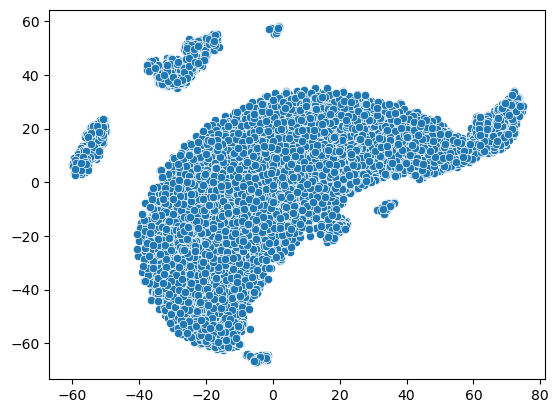

In [8]:
from sklearn.manifold import TSNE
import seaborn as sns

# Initialize TSNE with two components and a perplexity of 30
tsne = TSNE(n_components=2, perplexity=30)

# Fit and transform the data
tsne_data = tsne.fit_transform(AF)

# Create a scatterplot of the data
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1])
plt.show();

### Now let's cluster our data to export subpopulations

In [9]:
from sklearn.cluster import KMeans

# Initialize K-means with 3 clusters
kmeans = KMeans(n_clusters=5)

# Fit the data and predict the cluster labels
labels = kmeans.fit_predict(AF)

# Create a new data frame with only the rows in cluster 1
cluster_df = AF.loc[labels == 1]

# Remove the rows in cluster 1 from the original data frame
df1 = AF.loc[labels != 1]

df1.head()


,B1-A,B10-A,B11-A,B12-A,B13-A,B14-A,B2-A,B3-A,B4-A,B5-A,...,YG1-A,YG10-A,YG2-A,YG3-A,YG4-A,YG5-A,YG6-A,YG7-A,YG8-A,YG9-A
709825,408,384,385,374,379,378,407,402,388,381,...,390,380,390,396,408,386,397,393,386,371
593311,404,385,399,377,366,384,407,411,382,390,...,390,386,380,390,394,403,396,371,389,377
1246985,422,387,381,369,400,384,411,436,389,386,...,404,386,409,393,400,379,381,401,365,392
85283,382,392,401,381,398,382,399,406,384,381,...,397,388,380,385,376,396,383,400,392,385
560548,433,390,362,387,390,395,443,440,403,401,...,387,399,389,391,407,402,398,405,379,381


### Now let's apply TSNE on SC data set

/Users/rezamoosavi_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rezamoosavi_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


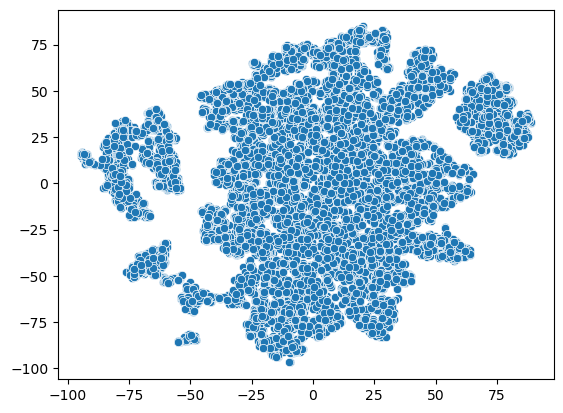

In [10]:
# Initialize TSNE with two components and a perplexity of 30
tsne = TSNE(n_components=2, perplexity=30)

# Fit and transform the data
tsne_data = tsne.fit_transform(SC)

# Create a scatterplot of the data
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1])
plt.show();

In [11]:
# Initialize K-means with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the data and predict the cluster labels
labels = kmeans.fit_predict(SC)

# Create a new data frame with only the rows in cluster 1
cluster_df = AF.loc[labels == 1]

# Remove the rows in cluster 1 from the original data frame
df2 = AF.loc[labels != 1]

df2.head()

,B1-A,B10-A,B11-A,B12-A,B13-A,B14-A,B2-A,B3-A,B4-A,B5-A,...,YG1-A,YG10-A,YG2-A,YG3-A,YG4-A,YG5-A,YG6-A,YG7-A,YG8-A,YG9-A
709825,408,384,385,374,379,378,407,402,388,381,...,390,380,390,396,408,386,397,393,386,371
593311,404,385,399,377,366,384,407,411,382,390,...,390,386,380,390,394,403,396,371,389,377
1246985,422,387,381,369,400,384,411,436,389,386,...,404,386,409,393,400,379,381,401,365,392
85283,382,392,401,381,398,382,399,406,384,381,...,397,388,380,385,376,396,383,400,392,385
560548,433,390,362,387,390,395,443,440,403,401,...,387,399,389,391,407,402,398,405,379,381


## Now let's check the overlap of the two populations with a Venn diagram
### Wee need to ensure that df1 and df2 are the same populations in our sample; otherwise, we need to compare permutations

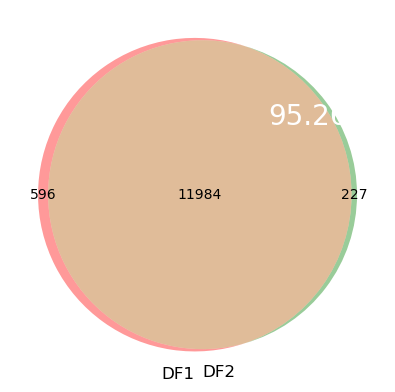

In [12]:
from matplotlib_venn import venn2

index_overlap = df1.index.intersection(df2.index)

# Calculate the percentage of overlap
overlap_percentage = len(index_overlap) / len(df1.index) * 100

# Create the Venn diagram
venn2(subsets=[set(df1.index), set(df2.index)], set_labels=['DF1', 'DF2'])

# Add the overlap percentage as text
plt.annotate(f"{overlap_percentage:.2f}%", xy=(0.25, 0.25), fontsize=20, color='white')

# Show the plot
plt.show()

# Here, we proved that autofluorescence acitivity is cell-specific!

### more data is needed to create an accurate model for characterization